In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['iris', 'iris-flower-dataset']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv("../input/iris/Iris.csv")

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* our dataset contains the 6 cloumns and 150 rows. the last column is our dependant variable which tell the type of iris species in each of the features.


In [5]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


the different types of the iris species and their respective numbers in the dataset is shown below

In [6]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

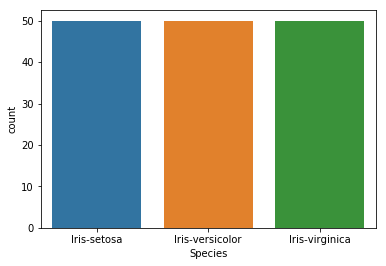

In [7]:
sns.countplot(x='Species',data=dataset)
plt.savefig('count sprecied in train data.png')

now since we have to fit the model to the logistic regression model we will have to convert the different species into labels for them to fit into the model other wise the model will cause an error

In [8]:
species={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [9]:
dataset=dataset.replace({'Species':species})

In [10]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


we can now see that the statistics of our dataset

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.1 KB


In [12]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


## Some features engineering

# we will now see which of the columns contain the most variance in the species prediction

In [13]:
dataset.corr()[['Species']].sort_values(by='Species',ascending=False)

,Species
Species,1.000000
PetalWidthCm,0.956464
PetalLengthCm,0.949043
Id,0.942830
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


we will remove our ID column column as it is only the serial number and does not convey any relevant information about the prediction

In [14]:
dataset.drop('Id',axis=1,inplace=True)

In [15]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


again finding the variance of the dataset

In [16]:
dataset.corr()[['Species']].sort_values(by='Species',ascending=False)

,Species
Species,1.000000
PetalWidthCm,0.956464
PetalLengthCm,0.949043
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


we can see that the petal width and petal length convey more than 95 percent of the information for prediction of the species. sepal width convey negetive relation 

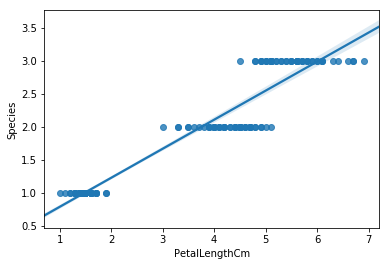

In [17]:
sns.regplot(x='PetalLengthCm',y='Species',data=dataset)
plt.savefig('dependance of petal length of iris flowers on prediction.png')

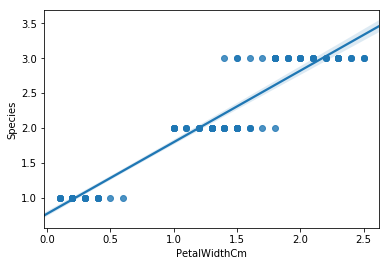

In [18]:
sns.regplot(x='PetalWidthCm',y='Species',data=dataset)
plt.savefig('dependance of petal width of iris flowers on prediction.png')

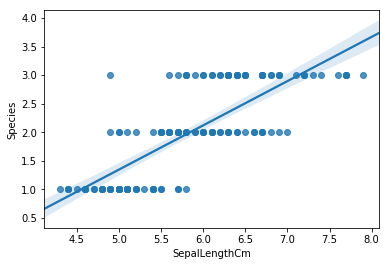

In [19]:
sns.regplot(x='SepalLengthCm',y='Species',data=dataset)
plt.savefig('dependance of sepal length of iris flowers on prediction.png')

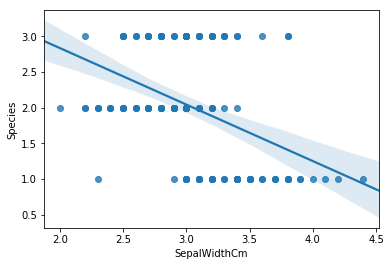

In [20]:
sns.regplot(x='SepalWidthCm',y='Species',data=dataset)
plt.savefig('dependance of sepal width of iris flowers on prediction.png')

now we split the dataset into our independant feature matrix and depeandant feature matrix

In [21]:
x_train=dataset.drop('Species',axis=1)
y_train=dataset[['Species']]

now we split our dataset into training and test set for training and predicting respectively

In [22]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x_train,y_train,test_size=0.2,random_state=18)


In [23]:
x_train.shape

(120, 4)

In [24]:
x_test.shape

(30, 4)

In [25]:
y_train.shape

(120, 1)

In [26]:
y_test.shape

(30, 1)

> **now we build our logistic regression classifier****

In [27]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=112,max_iter=50)

**logistic regression object/instance craeted 
now we will fit the object to the training data **

In [28]:
clf.fit(x_train,np.array(y_train).ravel())

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=112, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

predicting values from the fitted classifier for the test data

In [29]:
y_predict=clf.predict(x_test)

checking accuracy :-

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]])

all the samples of the test data have been classified correctly

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

100.0

**accuracy of the model is 100 percent**

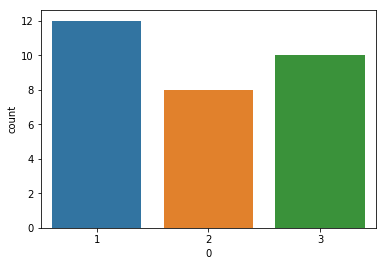

In [32]:
y_predict=pd.DataFrame(y_predict)
sns.countplot(x=0,data=y_predict)
plt.savefig('y_predict data.png')